In [8]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#Import CPI of Rent Prices % Change in WPB/FLL/MIA
cpi_rent_path = Path("rent_cpi.csv")
cpi_rent_df = pd.read_csv(cpi_rent_path)


#Clean Data
#cpi_rent_df.drop(31, inplace = True)
cpi_rent_df = cpi_rent_df.rename(columns={'CUURA320SEHA_PCH': 'Percent Change'})
cpi_rent_df = cpi_rent_df.rename(columns={'DATE': 'Date'})
cpi_rent_df

,Date,Percent Change
0,2016-09-01,0.40952
1,2016-10-01,0.78520
2,2016-11-01,0.40983
3,2016-12-01,0.38350
4,2017-01-01,0.06242
...,...,...
80,2023-05-01,0.77712
81,2023-06-01,0.92613
82,2023-07-01,0.99993
83,2023-08-01,0.28257


In [12]:
#Import 30-Year Fixed Rate Mortgage Average in the United States 
interest_rates_path = Path("interest_rates.csv")
interest_rates_df = pd.read_csv(interest_rates_path)


#Clean Data
#cpi_rent_df.drop(31, inplace = True)
interest_rates_df = interest_rates_df.rename(columns={'MORTGAGE30US_PCH': 'Percent Change'})
interest_rates_df = interest_rates_df.rename(columns={'DATE': 'Date'})
interest_rates_df

,Date,Percent Change
0,2016-09-01,0.72780
1,2016-10-01,0.28902
2,2016-11-01,8.64553
3,2016-12-01,11.35279
4,2017-01-01,-1.14340
...,...,...
80,2023-05-01,1.30075
81,2023-06-01,4.49805
82,2023-07-01,1.87668
83,2023-08-01,3.39181


In [15]:
#Merge the two dataframes 
mergedinterest_df = interest_rates_df.merge(cpi_rent_df, on='Date', suffixes=(' of Rent', ' of Interest Rates'))
mergedinterest_df

,Date,Percent Change of Rent,Percent Change of Interest Rates
0,2016-09-01,0.72780,0.40952
1,2016-10-01,0.28902,0.78520
2,2016-11-01,8.64553,0.40983
3,2016-12-01,11.35279,0.38350
4,2017-01-01,-1.14340,0.06242
...,...,...,...
80,2023-05-01,1.30075,0.77712
81,2023-06-01,4.49805,0.92613
82,2023-07-01,1.87668,0.99993
83,2023-08-01,3.39181,0.28257


In [17]:
from scipy import stats

# Extract the independent and dependent variables
X = interest_rates_df['Percent Change']
y = cpi_rent_df['Percent Change']

# Fit the linear regression model
model = stats.linregress(X, y)

# Print the model coefficients
print('Intercept:', model.intercept)
print('Slope:', model.slope)

# Print the R-squared and p-value
print('R-squared:', model.rvalue**2)
print('p-value:', model.pvalue)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if 'p-value' < 'alpha':
    print("Reject the null hypothesis. There is no relationship between mortgage rates and rent prices.")
else:
    print("Fail to reject the null hypothesis.  There is a relationship between mortgage rates and rent prices.")

Intercept: 0.47812951769160555
Slope: 0.03489420873903422
R-squared: 0.10549387000977391
p-value: 0.002422694633446932
Fail to reject the null hypothesis.  There is a relationship between mortgage rates and rent prices.


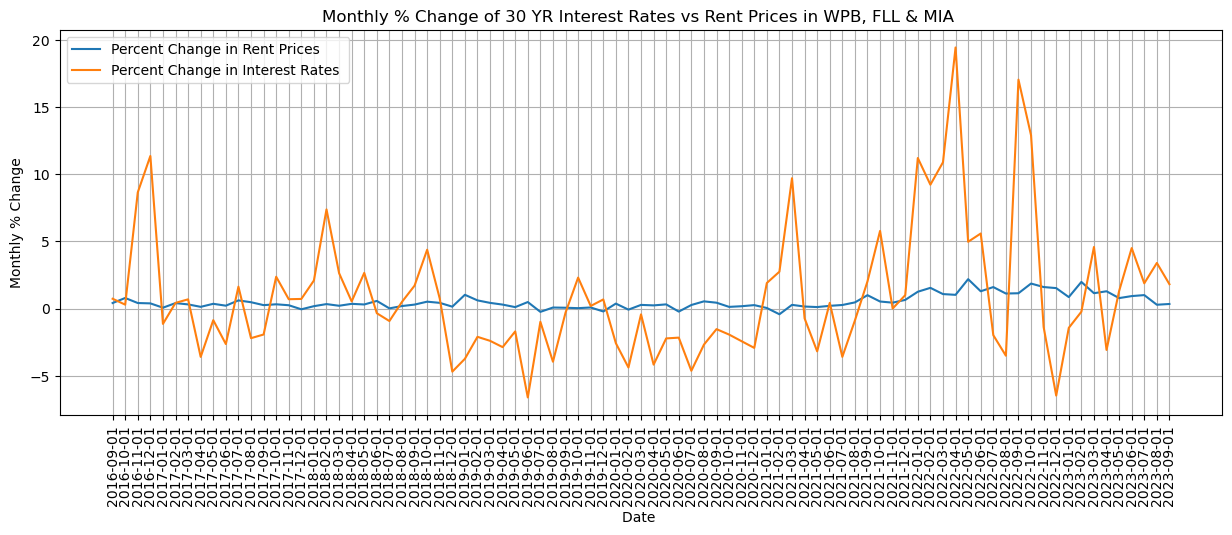

In [20]:
# Extract the x- and y-axes for each DataFrame
mergedinterest_x = mergedinterest_df["Date"]
mergedinterest_y = cpi_rent_df["Percent Change"]
mergedinterest_y1 = interest_rates_df["Percent Change"]

# Create the line chart
plt.figure(figsize=(15, 5))
plt.plot(mergedinterest_x, mergedinterest_y, label=("Percent Change in Rent Prices"))
plt.plot(mergedinterest_x, mergedinterest_y1, label=("Percent Change in Interest Rates "))


# Add a title, labels, and grid lines
plt.title("Monthly % Change of 30 YR Interest Rates vs Rent Prices in WPB, FLL & MIA ")
plt.ylabel("Monthly % Change")
plt.xlabel("Date ")
plt.xticks(rotation=90)
#plt.ylim(280,450)
plt.grid(True)

# Add a legend and show the plot
plt.legend()
plt.show()